**Mount Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Import Required Libraries**

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


**Set Dataset Paths**

In [3]:
dataset_dir = '/content/drive/MyDrive/SIGN_LANGUAGE_DATA'


**Image Generator (Auto Split)**

In [4]:
img_size = 128
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2   # 80% train, 20% validation
)

train_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 962 images belonging to 6 classes.
Found 240 images belonging to 6 classes.


**CNN Model**

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,517,574 (24.86 MB)

 Trainable params: 6,517,574 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

**Train Model**

In [7]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)


Epoch 1/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 448s 15s/step - accuracy: 0.1927 - loss: 1.7943 - val_accuracy: 0.1667 - val_loss: 1.7703
Epoch 2/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 197s 6s/step - accuracy: 0.2674 - loss: 1.7273 - val_accuracy: 0.5542 - val_loss: 1.2449
Epoch 3/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 195s 6s/step - accuracy: 0.5478 - loss: 1.1482 - val_accuracy: 0.6083 - val_loss: 0.8376
Epoch 4/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 194s 6s/step - accuracy: 0.6854 - loss: 0.7862 - val_accuracy: 0.8250 - val_loss: 0.5132
Epoch 5/5
31/31 ━━━━━━━━━━━━━━━━━━━━ 188s 6s/step - accuracy: 0.7446 - loss: 0.6775 - val_accuracy: 0.8250 - val_loss: 0.4925


**Save Model**

In [8]:
model.save('/content/drive/MyDrive/SIGN_LANGUAGE_ Model/sign_language_model.h5')


**Accuracy & Loss Graph**

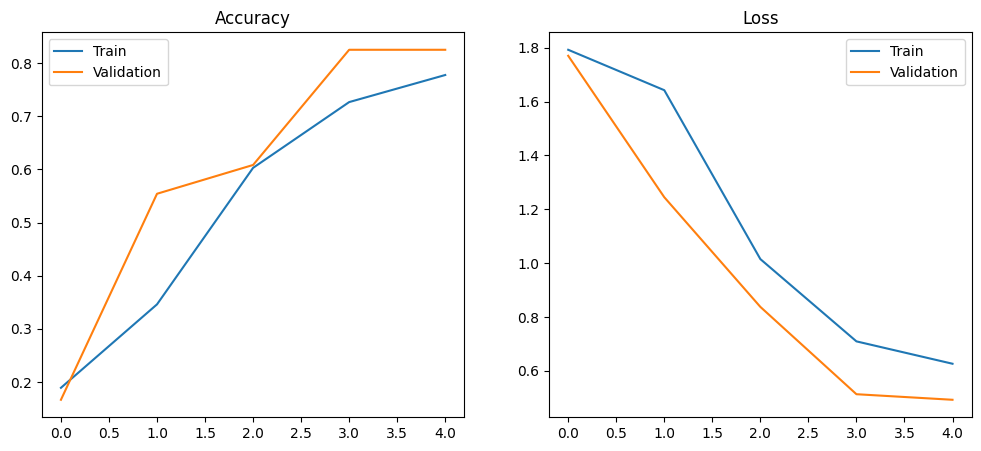

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Loss')

plt.show()


**Predict a Single Image (From Drive)**

In [10]:
class_names = list(train_data.class_indices.keys())

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    print("Predicted Sign:", predicted_class)
    plt.imshow(img)
    plt.axis('off')


**Test Example**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Predicted Sign: B_(b)


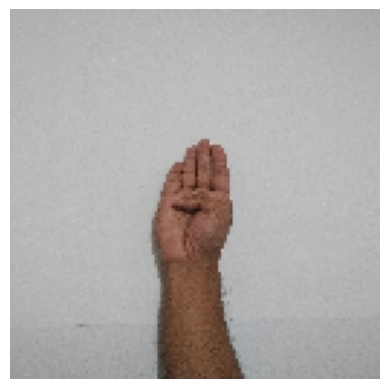

In [11]:
test_img = '/content/drive/MyDrive/SIGN_LANGUAGE_DATA/B_(b)/IMG_20251010_015218_TIMEBURST1.jpg'
predict_image(test_img)
